In [49]:
import pickle
from matplotlib import pyplot as plt
import os
from itertools import chain


In [50]:
plt.rcParams.update({'font.size': 22})
legend_font_size = 15

In [51]:
def parse_filename(filename):
    # Example: qlstm.q8.lr0.005.vv2.l3.pkl
    parts = filename.split('.')
    model = parts[0]
    lr = None
    layers = None
    variant = None
    qubits = None
    for i, p in enumerate(parts):
        if p.startswith('lr'):
            lr = p[2:] + '.' + parts[i+1]
        if p.startswith('l') and p[1:].isdigit():
            layers = int(p[1:])
        if p.startswith('v'):
            variant = 'v1' if p[1:] == 'default' else p[1:]
        if p.startswith('q') and not p == 'qlstm':
            qubits = int(p[1:])
    return model, variant, layers, lr, qubits

Loading qlstm.q10.lr0.001.vdefault.l2.pkl...
Loading qlstm.q10.lr0.001.vdefault.l3.pkl...
Loading qlstm.q10.lr0.002.vdefault.l3.pkl...
Loading qlstm.q10.lr0.005.vdefault.l3.pkl...
Loading qlstm.q10.lr0.005.vreupload.l3.pkl...
Loading qlstm.q10.lr0.005.vreupload.l4.pkl...
Loading qlstm.q10.lr0.005.vv2.l3.pkl...
Loading qlstm.q10.lr0.01.vdefault.l3.pkl...
Loading qlstm.q10.lr0.01.vv2.l3.pkl...
Loading qlstm.q10.lr0.02.vdefault.l3.pkl...
Loading qlstm.q10.lr0.05.vdefault.l3.pkl...
Loading qlstm.q10.lr0.1.vdefault.l3.pkl...
Loading qlstm.q11.lr0.001.vdefault.l2.pkl...
Loading qlstm.q12.lr0.005.vreupload.l3.pkl...
Loading qlstm.q8.lr0.005.vdefault.l3.pkl...
Loading qlstm.q8.lr0.005.vreupload.l3.pkl...
Loading qlstm.q8.lr0.005.vreupload.l4.pkl...
Loading qlstm.q8.lr0.005.vv2.l3.pkl...
Loading qlstm.q8.lr0.005.vv2.l4.pkl...
1.9804135000863463
1.9358041081713127
1.6286143147754086
1.538020689893198
1.622016367069661
1.6396174583346905
2.0794354551926286
2.079441918002957
1.9102763474513338
1.6

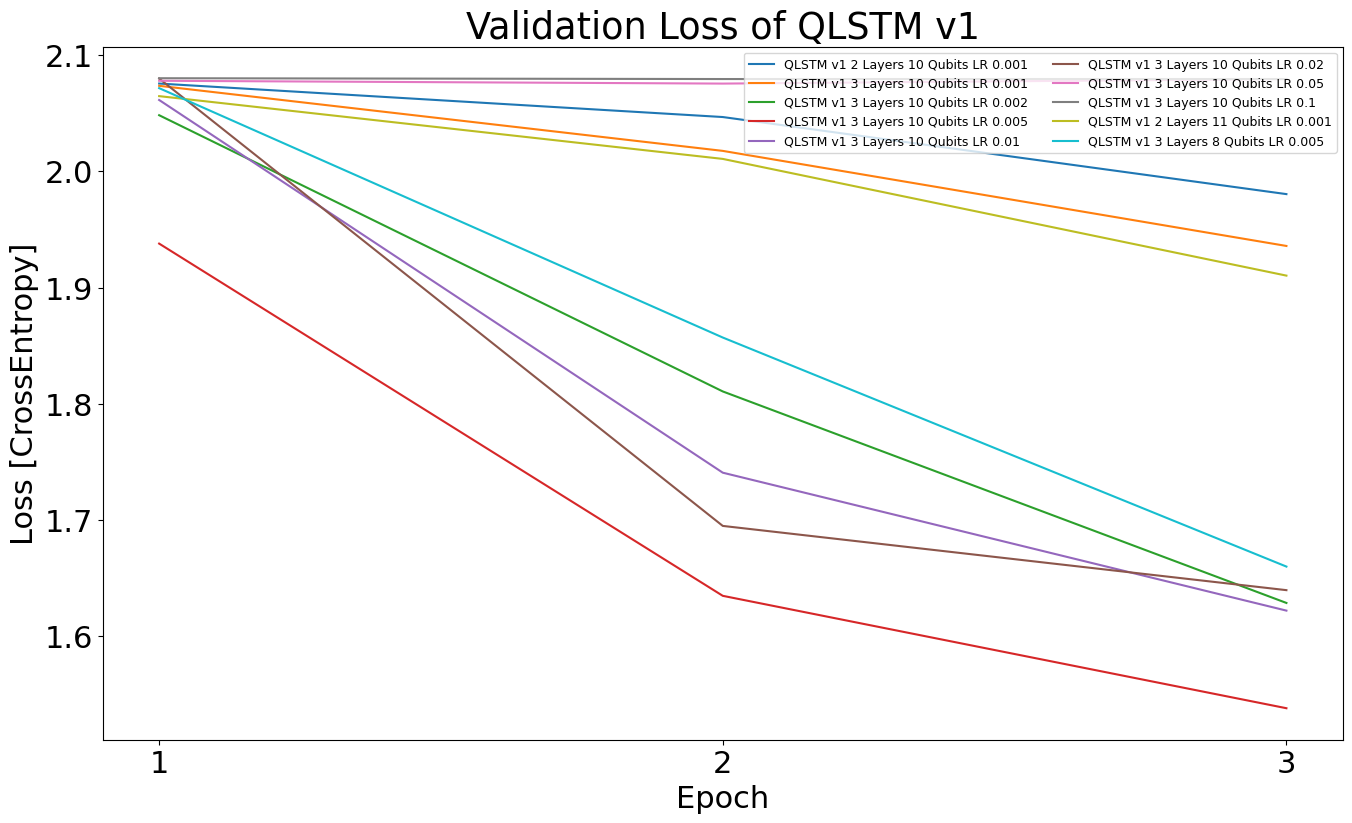

1.3089633576176076
1.2423974714569161
1.4227866406190077
1.4015201173698113


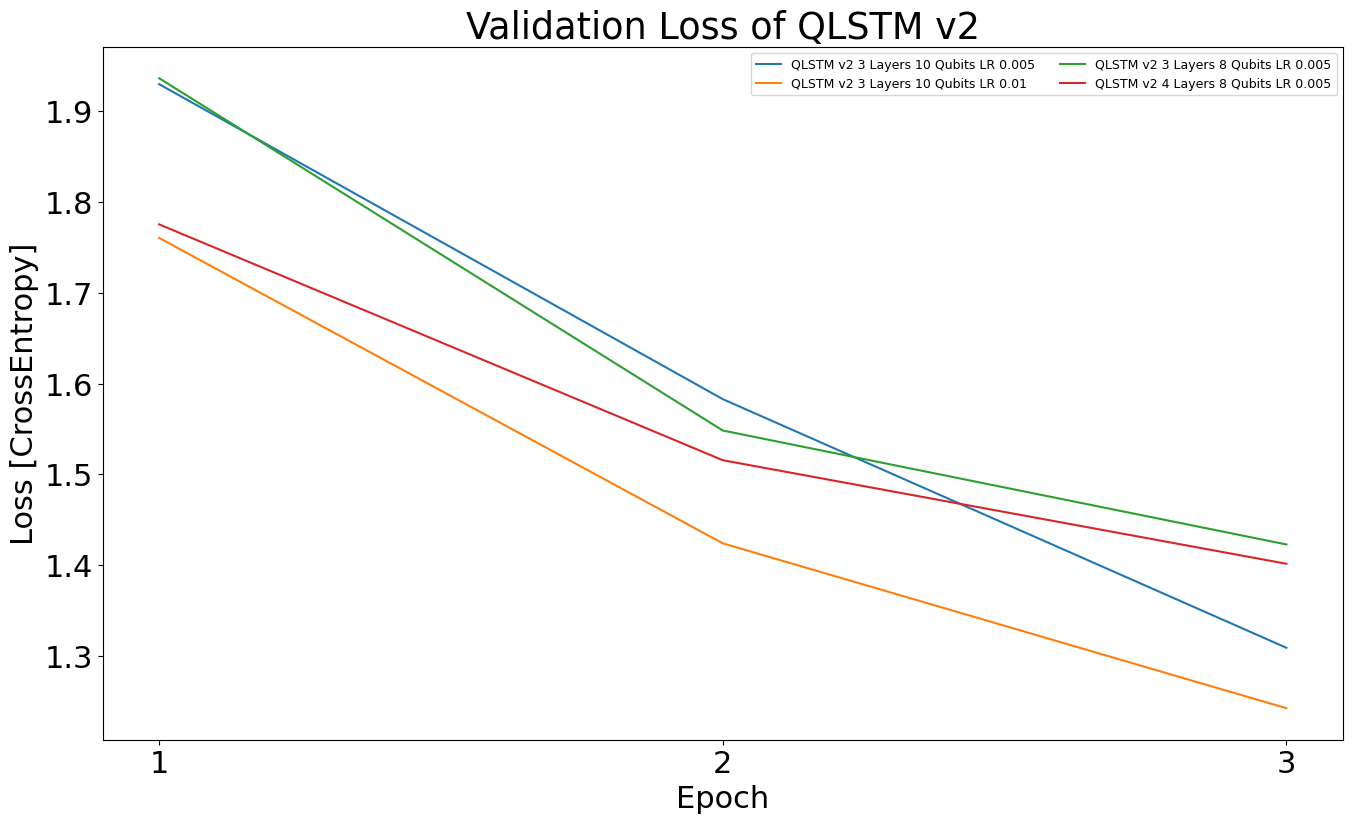

0.7753801001107208
1.279187763141783
0.802524999965685
1.2596120486005469
0.9612154014296682


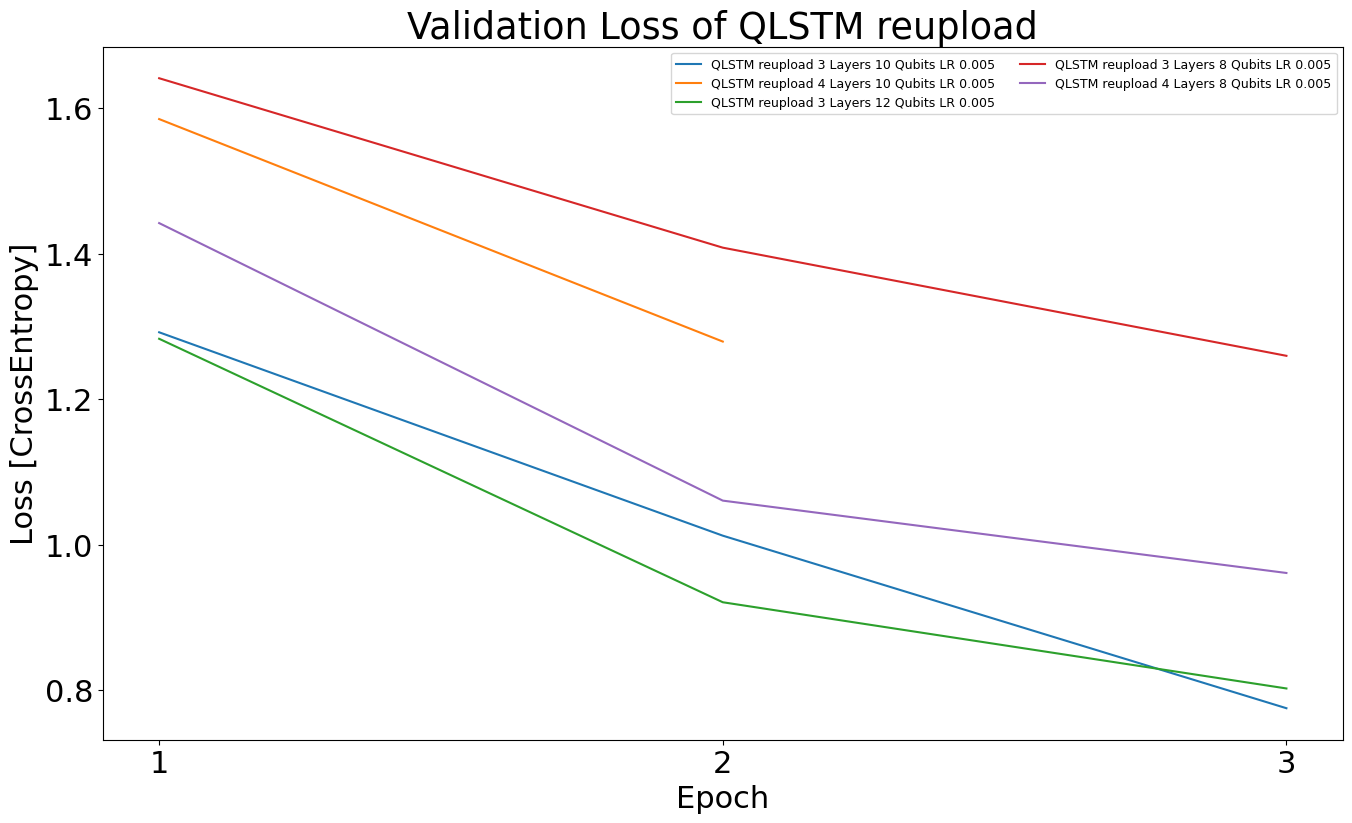

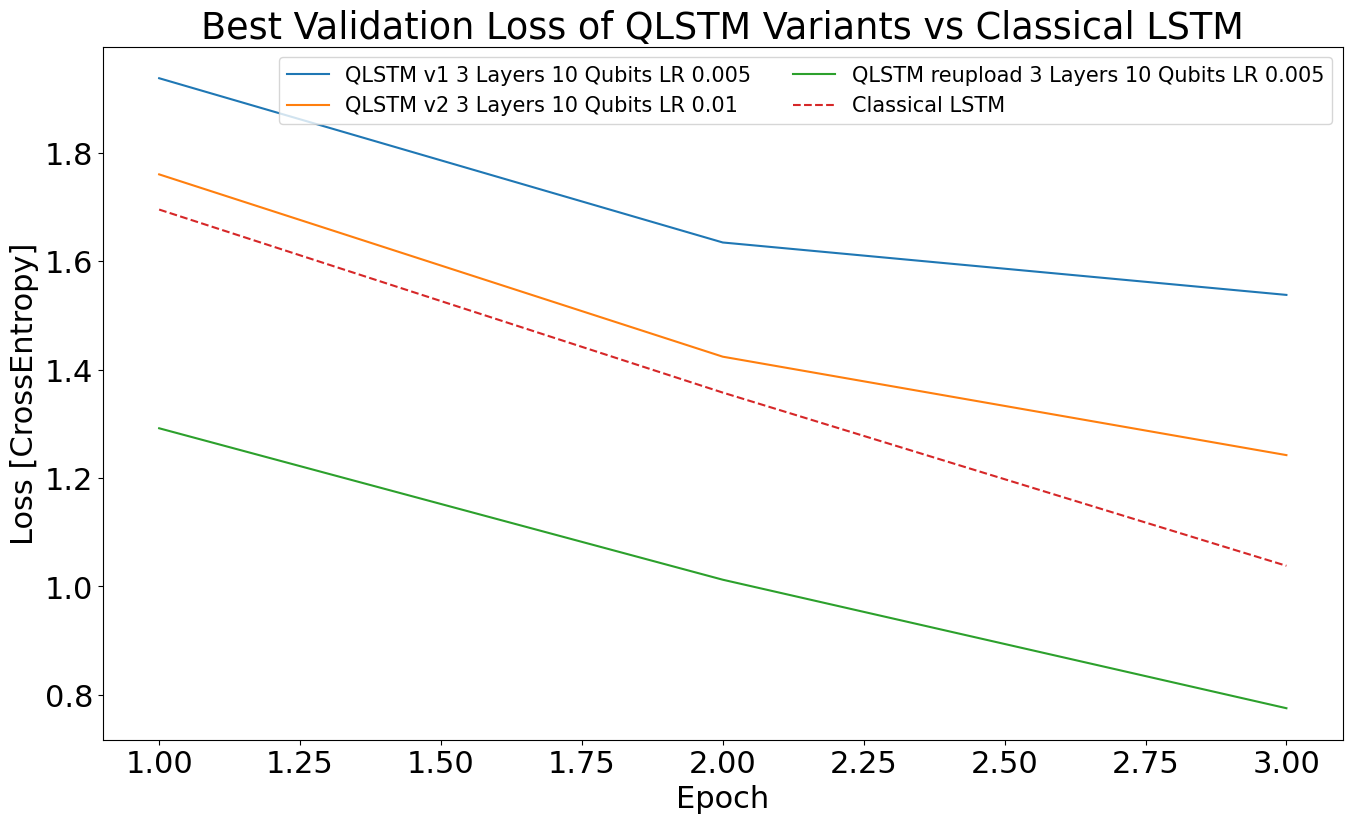

In [ ]:
filenames = []

# os.walk('./fully-trained/')
plot_dict = {
    'v1': [],
    'v2': [],
    'reupload': []
}

classical_lstm = None
if os.path.exists('./classical_LSMT_audio.h5'):
    with open('./classical_LSMT_audio.h5', 'rb') as file:
        classical_lstm = pickle.load(file) 

for root, dirs, files in os.walk('./delftblue-new/'):
    for filename in files:
        if filename.endswith('.pkl'):
            filenames.append(filename)
            print(f"Loading {filename}...")
            file_path = os.path.join(root, filename)
            with open(file_path, 'rb') as file:
                model_dict = pickle.load(file)
                model, variant, layers, lr, qubits = parse_filename(filename)
                plot_dict[variant].append((model_dict['loss'], f"{model.upper()} {variant} {layers} Layers {qubits} Qubits LR {lr}"))
                #plt.plot(range(1, 4), model_dict['loss'][:3], label=f"{model.upper()} {variant} {layers} Layers {qubits} Qubits LR {lr}")


best_models = {
    'v1': None,
    'v2': None,
    'reupload': None
}
for variant, data in plot_dict.items():
    plt.figure(figsize=(16, 9))
    plt.title(f"Validation Loss of QLSTM {variant}")
    best_models[variant] = min(data, key=lambda x: min(x[0][:3]))
    for loss, label in data:
        number_of_items = min(len(loss), 3)
        print(loss[number_of_items - 1])
        plt.plot(range(1, number_of_items + 1), loss[:number_of_items], label=label)
        

    plt.legend(fontsize=9, loc='upper right', ncol=2)
    plt.xlabel('Epoch')
    plt.xticks(range(1, 4))
    plt.ylabel('Loss [CrossEntropy]')
    plt.show()

# Graph all best models and compare with classical LSTM
plt.figure(figsize=(16, 9))
plt.title("Best Validation Loss of QLSTM Variants vs Classical LSTM")
for variant, (loss, label) in best_models.items():
    number_of_items = min(len(loss), 3)
    print(loss[number_of_items - 1])
    plt.plot(range(1,number_of_items + 1), loss[:number_of_items], label=label)

if classical_lstm:
    plt.plot(range(1, 3 + 1), classical_lstm['loss'][:3], label='Classical LSTM', linestyle='--')
    print(classical_lstm['loss'][2])
plt.legend(fontsize=legend_font_size, loc='upper right', ncol=2)
plt.xlabel('Epoch')
plt.ylabel('Loss [CrossEntropy]')
plt.show()


Loading qlstm.q10.lr0.005.vreupload.l3.pkl...
Loading qlstm.q12.lr0.005.vreupload.l3.pkl...
Loading qlstm.q8.lr0.005.vreupload.l4.pkl...
Loading qlstm.q8.lr0.005.vdefault.l3.pkl...
Loading qlstm.q8.lr0.005.vreupload.l4.pkl...
Loading qlstm.q8.lr0.005.vreupload.l5.pkl...
Loading qlstm.q8.lr0.005.vv2.l3.pkl...
Loading qlstm.q10.lr0.001.vdefault.l2.pkl...
Loading qlstm.q10.lr0.001.vdefault.l3.pkl...
Loading qlstm.q10.lr0.002.vdefault.l3.pkl...
Loading qlstm.q10.lr0.005.vdefault.l3.pkl...
Loading qlstm.q10.lr0.01.vdefault.l3.pkl...
Loading qlstm.q10.lr0.02.vdefault.l3.pkl...
Loading qlstm.q10.lr0.05.vdefault.l3.pkl...
Loading qlstm.q10.lr0.1.vdefault.l3.pkl...
Loading qlstm.q11.lr0.001.vdefault.l2.pkl...
Loading qlstm.q8.lr0.005.vdefault.l3.pkl...
Loading qlstm.q8.lr0.005.vreupload.l3.pkl...
Loading qlstm.q8.lr0.005.vreupload.l4.pkl...
Loading qlstm.q8.lr0.005.vv2.l3.pkl...
Loading qlstm.q10.lr0.001.vdefault.l2.pkl...
Loading qlstm.q10.lr0.001.vdefault.l3.pkl...
Loading qlstm.q10.lr0.002.v

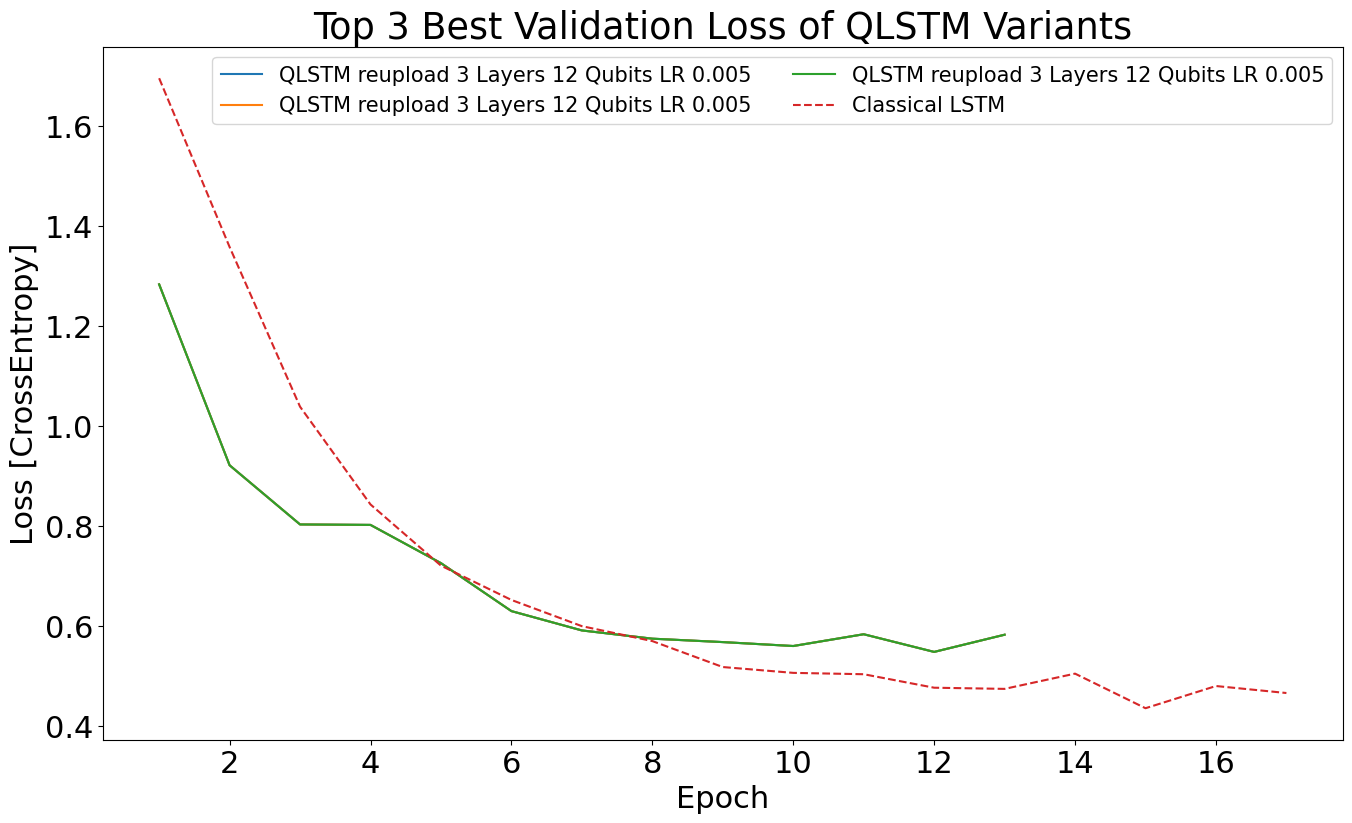

In [53]:
from collections import OrderedDict
from functools import reduce


filenames = []

# os.walk('./fully-trained/')
plot_dict = {
    'v1': [],
    'v2': [],
    'reupload': []
}

classical_lstm = None
if os.path.exists('./classical_LSMT_audio.h5'):
    with open('./classical_LSMT_audio.h5', 'rb') as file:
        classical_lstm = pickle.load(file) 

for root, dirs, files in os.walk('./'):
    for filename in files:
        if filename.endswith('.pkl') and not filename.startswith('test'):
            filenames.append(filename)
            print(f"Loading {filename}...")
            file_path = os.path.join(root, filename)
            with open(file_path, 'rb') as file:
                model_dict = pickle.load(file)
                model, variant, layers, lr, qubits = parse_filename(filename)
                plot_dict[variant].append((model_dict['loss'], f"{model.upper()} {variant} {layers} Layers {qubits} Qubits LR {lr}"))
                #plt.plot(range(1, 4), model_dict['loss'][:3], label=f"{model.upper()} {variant} {layers} Layers {qubits} Qubits LR {lr}")


best_models = []
for variant, data in plot_dict.items():
    best_models += data
print(len(best_models), "models found")
best_models.sort(key=lambda x: min(x[0]))
print(best_models[:3])

# Plot top 3 best models
plt.figure(figsize=(16, 9))
plt.title("Top 3 Best Validation Loss of QLSTM Variants")
for i in range(3):    
    model = best_models[i]
    plt.plot(range(1, len(model[0]) + 1), model[0], label=model[1])
        
if classical_lstm:
    plt.plot(range(1, len(classical_lstm['loss']) + 1), classical_lstm['loss'], label='Classical LSTM', linestyle='--')
plt.legend(fontsize=legend_font_size, loc='upper right', ncol=2)
plt.xlabel('Epoch')
plt.ylabel('Loss [CrossEntropy]')
plt.show()




In [54]:
from q_lstm_tf_v2 import QLSTM
import pennylane as qml
import tensorflow as tf

(<Figure size 1400x400 with 1 Axes>, <Axes: >)

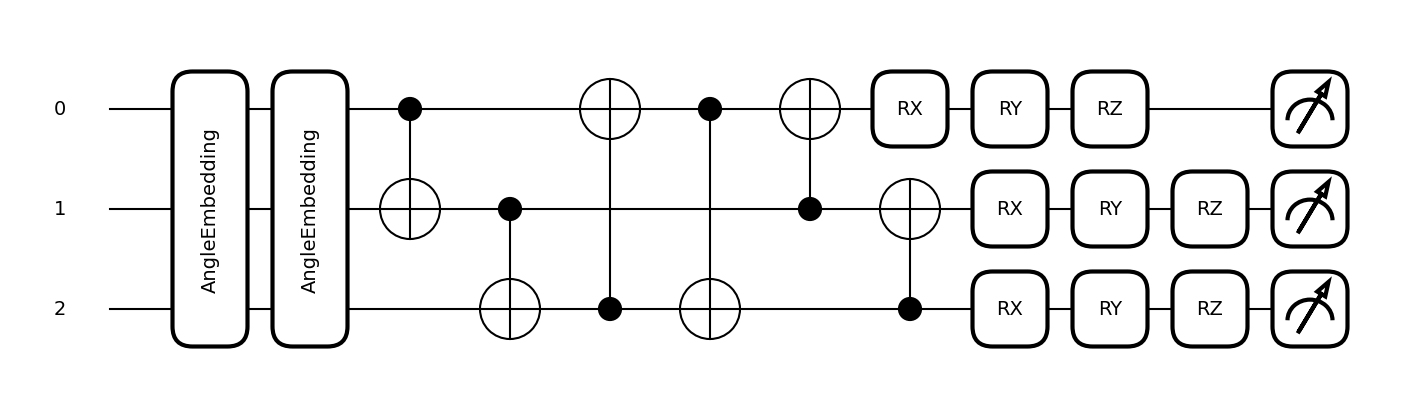

In [55]:
qlstm = QLSTM(1, layers=1)
qml.draw_mpl(qlstm.circuit)(tf.random.uniform((1, qlstm.wires)), tf.random.uniform(qlstm.shapes['weights']))



# Visuals for Testing QLSTMs

In [56]:
# Load saved sin models
filenames = []

for root, dirs, files in os.walk('./testing'):
    for filename in files:
        if filename.endswith('.h5') and not 'basel' in filename:
            filenames.append(filename)
            print(f"Loading {filename} ...")
            file_path = os.path.join(root, filename)


Loading classical_lstm_sin.h5 ...
Loading model_qlstm_qubits_3_layers_1_lr_0.0001.h5 ...
Loading model_qlstm_qubits_3_layers_1_lr_0.001.h5 ...
Loading model_qlstm_qubits_3_layers_1_lr_0.01.h5 ...
Loading model_qlstm_qubits_3_layers_2_lr_0.0001.h5 ...
Loading model_qlstm_qubits_3_layers_2_lr_0.001.h5 ...
Loading model_qlstm_qubits_3_layers_2_lr_0.01.h5 ...
Loading model_qlstm_qubits_3_layers_3_lr_0.0001.h5 ...
Loading model_qlstm_qubits_3_layers_3_lr_0.001.h5 ...
Loading model_qlstm_qubits_3_layers_3_lr_0.01.h5 ...
Loading model_qlstm_reupload_qubits_3_layers_1_lr_0.0001.h5 ...
Loading model_qlstm_reupload_qubits_3_layers_1_lr_0.001.h5 ...
Loading model_qlstm_reupload_qubits_3_layers_1_lr_0.01.h5 ...
Loading model_qlstm_reupload_qubits_3_layers_2_lr_0.0001.h5 ...
Loading model_qlstm_reupload_qubits_3_layers_2_lr_0.001.h5 ...
Loading model_qlstm_reupload_qubits_3_layers_2_lr_0.01.h5 ...
Loading model_qlstm_reupload_qubits_3_layers_3_lr_0.0001.h5 ...
Loading model_qlstm_reupload_qubits_3_

50
100
150
200
250
300
350
400
450


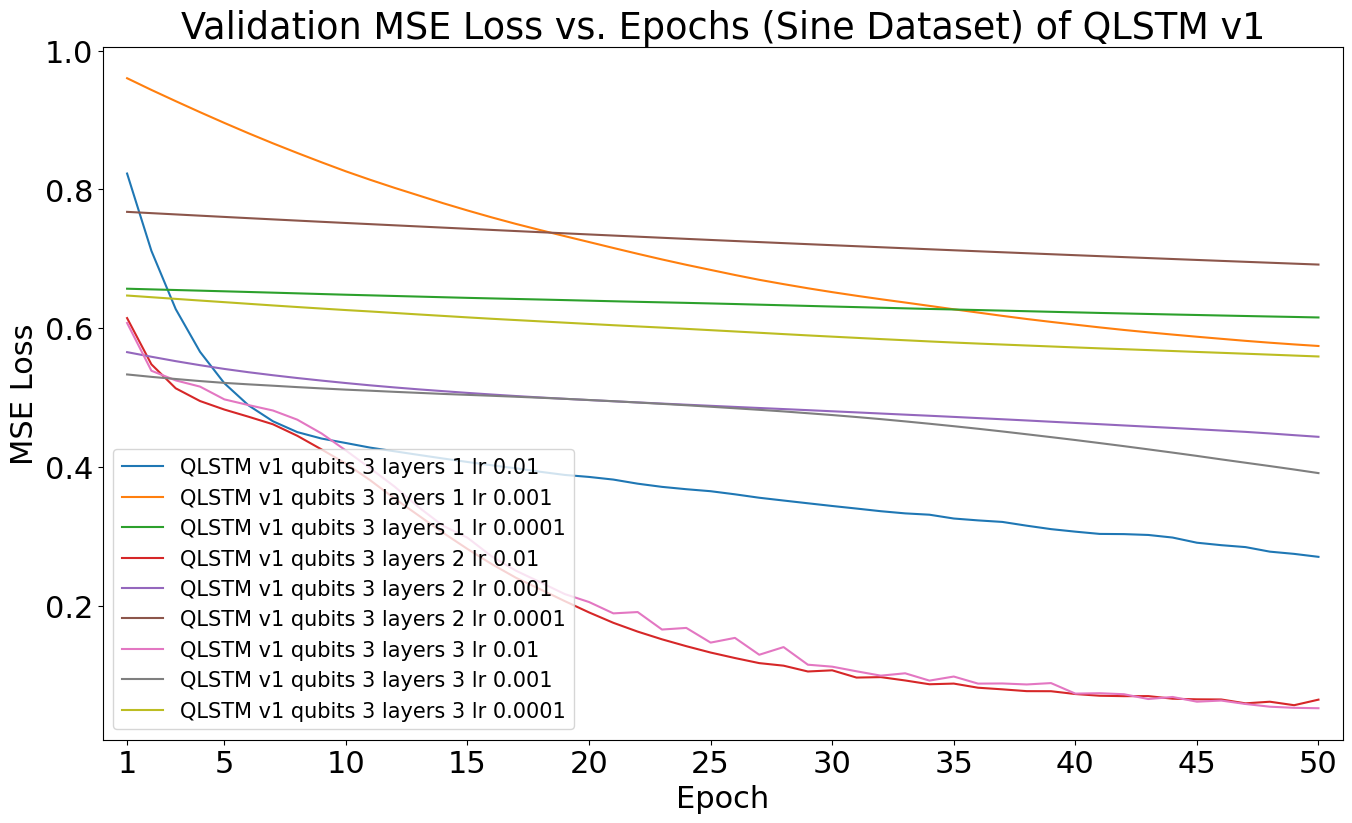

500
550
600
650
700
750
800
850
900


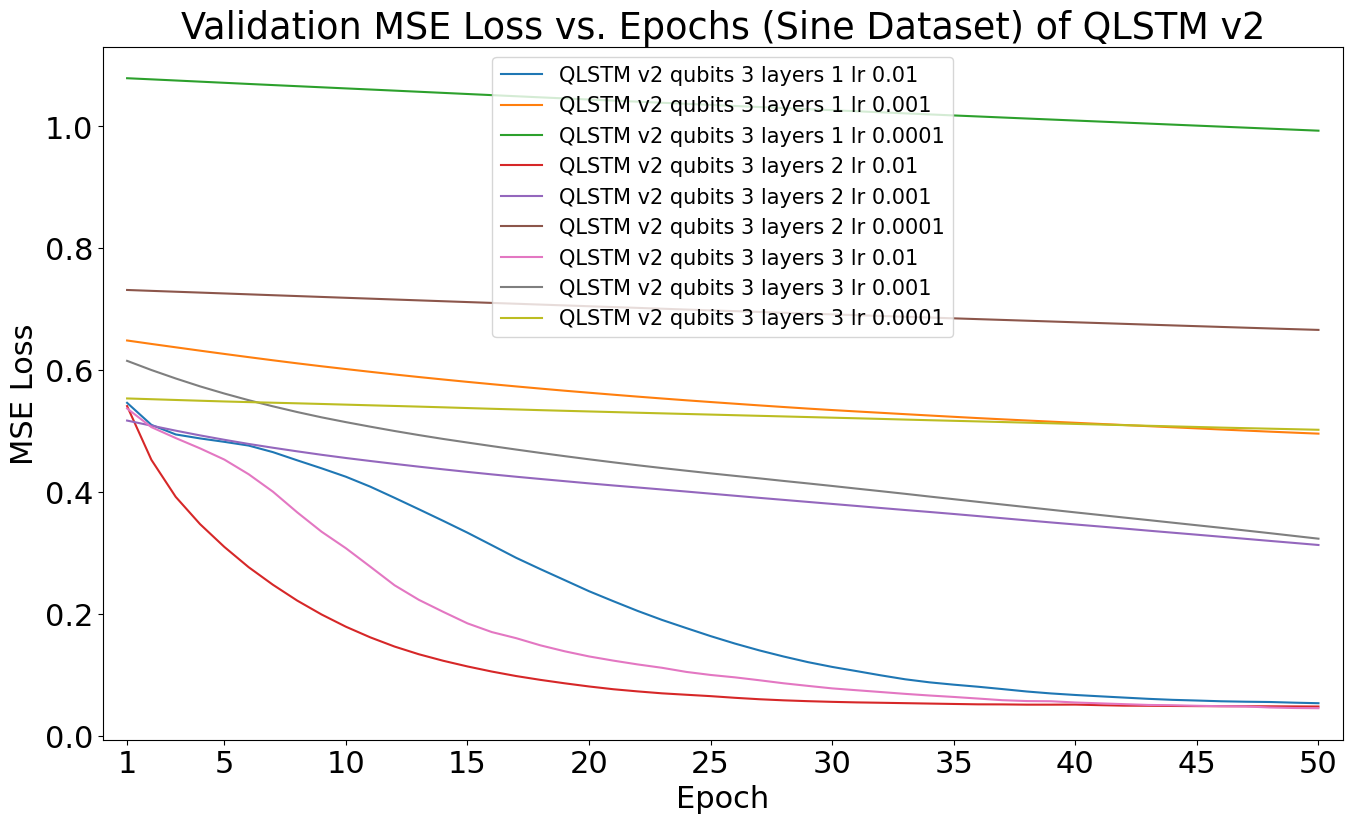

950
1000
1050
1100
1150
1200
1250
1300
1350


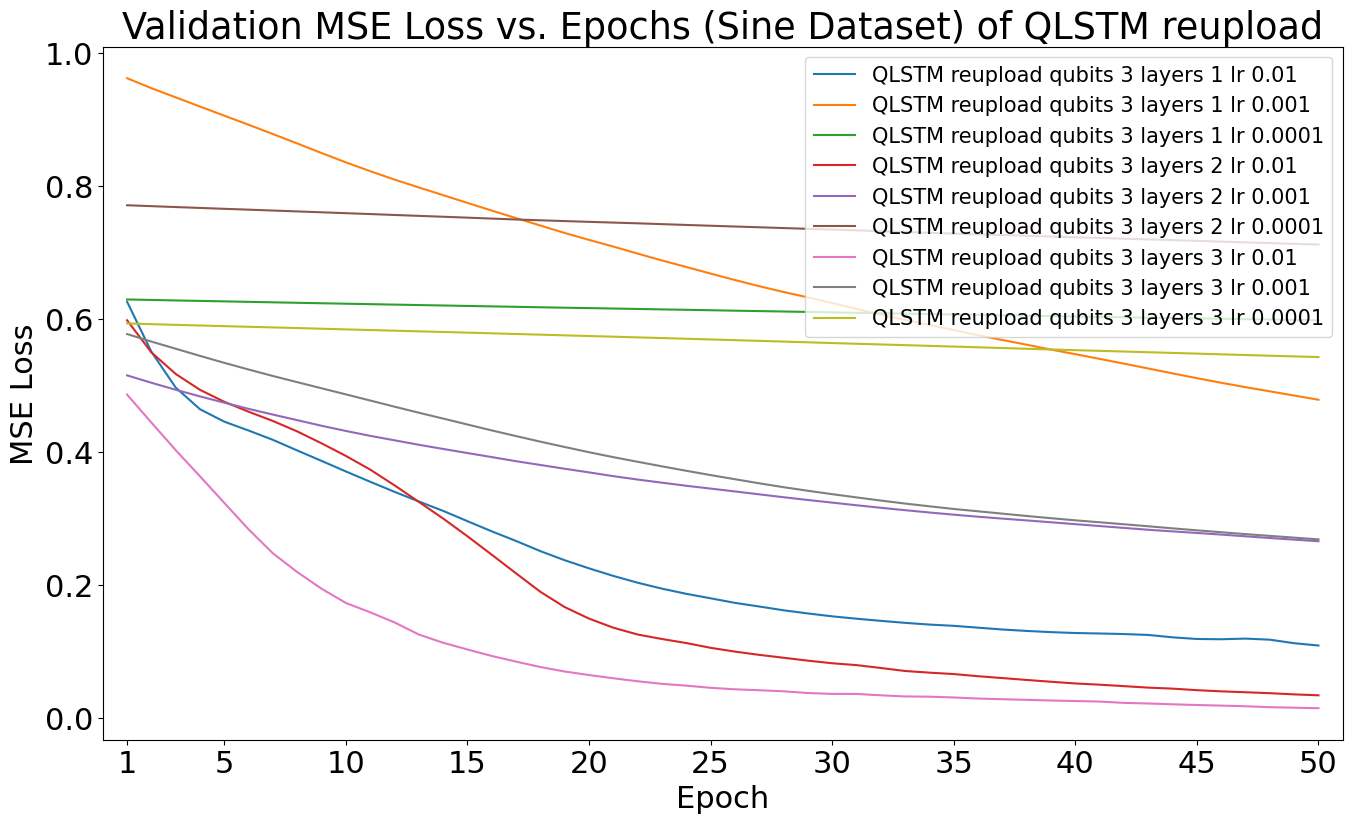

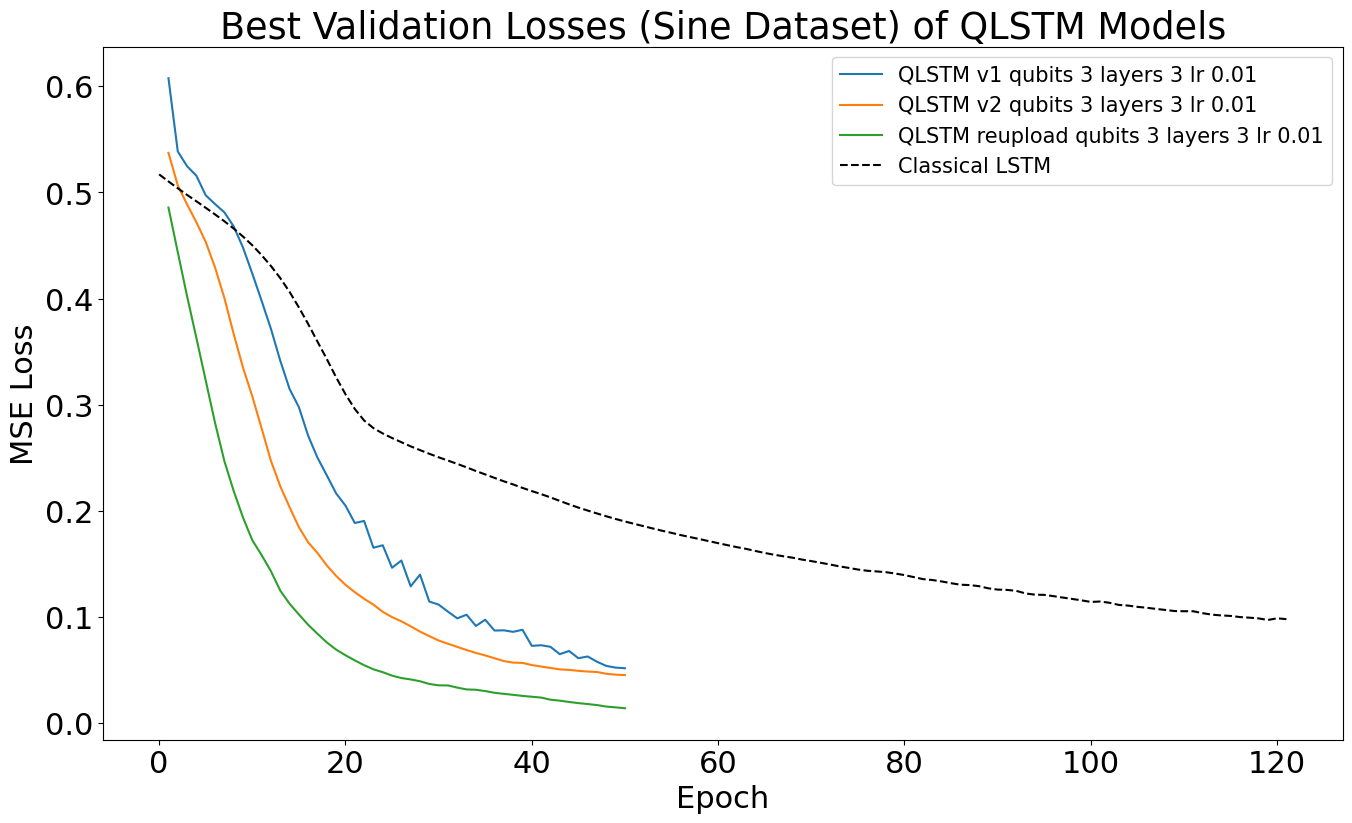

Best Loss for QLSTM v1: 0.05189005690889584
Best Loss for QLSTM v2: 0.045454112444975346
Best Loss for QLSTM reupload: 0.014229130558711969
Best Loss for LSTM: 0.0973155293735848


In [57]:
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

# def parse_filename(filename):
#     # Example: qlstm.q8.lr0.005.vv2.l3.pkl
#     parts = filename.split('.')
#     model = parts[0]
#     lr = None
#     layers = None
#     variant = None
#     for i, p in enumerate(parts):
#         if p.startswith('lr'):
#             lr = p[2:] + '.' + parts[i+1]
#         if p.startswith('l') and p[1:].isdigit():
#             layers = int(p[1:])
#         if p.startswith('v'):
#             variant = 'v1' if p[0] == 'default' else p[0]
#     return model, variant, layers, lr
def parse_filename(filename):
    # Example: qlstm.q8.lr0.005.vv2.l3.pkl
    parts = filename.split('_')
    lr = None
    layers = None
    variant = 'v1' if parts[2] == 'qubits' else parts[2]
    for i, p in enumerate(parts):
        if p.startswith('lr'):
            lr = float(parts[i+1][:-3])
        if p.startswith('layers'):
            layers = int(parts[i+1])
        if p.startswith('qubits'):
            qubits = int(parts[i+1])
    return variant, layers, lr, qubits

# Organize results by experiment, model, variant, layers, lr
results = {}
classical_dict = {}
for fname in filenames:
    file_path = os.path.join(root, fname)
    with open(file_path, 'rb') as file:
        model_dict = pickle.load(file)
    if 'classical' in fname:
        classical_dict[fname.split('.')[0].split('_')[-1]] = model_dict
        continue
    variant, layers, lr, qubits = parse_filename(fname)
    key = ('QLSTM', variant)
    if key not in results:
        results[key] = []
    val_loss, val_accuracy, best_loss = model_dict['loss'], model_dict['accuracy'], model_dict['best_loss']
    results[key].append({
        'layers': layers,
        'lr': lr,
        'val_loss': val_loss,
        'final_val_mse': best_loss,
        'qubits': qubits,
        'fname': fname
    })

# Example: Plotting for Sin Dataset (repeat for Basel if available)
# 1. Line plot of MSE loss vs. epochs for each model/variant
best_losses = []
curr_length = 0
for (model, variant), runs in results.items():
    plt.figure(figsize=(16, 9))
    
    for run in sorted(runs, key=lambda x: len(x['val_loss'])):
        label = f"{model.upper()} {variant} qubits {run['qubits']} layers {run['layers']} lr {run['lr']}"
        print(len(run['val_loss']))

        plt.plot(range(1,len(run['val_loss']) - curr_length + 1) , run['val_loss'][curr_length:len(run['val_loss'])], label=f"{label}")
        next_length = len(run['val_loss'])
        
        run['val_loss'] = run['val_loss'][curr_length:len(run['val_loss'])]
        curr_length = next_length
    best_losses += [(model, variant, sorted(runs, key=lambda x: min(x['val_loss']))[0])]
    plt.title(f"Validation MSE Loss vs. Epochs (Sine Dataset) of QLSTM {variant}")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.xlim(0, 51)
    plt.xticks([1] + list(range(5, 51, 5)))
    plt.legend(fontsize=legend_font_size)
    plt.show()
    break    



for (model, variant), runs in results.items():
    if variant != 'v2':
        continue
    plt.figure(figsize=(16, 9))
    
    for run in sorted(runs, key=lambda x: len(x['val_loss'])):
        label = f"{model.upper()} {variant} qubits {run['qubits']} layers {run['layers']} lr {run['lr']}"
        print(len(run['val_loss']))

        plt.plot(range(1,len(run['val_loss']) - curr_length + 1) ,run['val_loss'][curr_length:len(run['val_loss'])], label=f"{label}")
        next_length = len(run['val_loss'])
        
        run['val_loss'] = run['val_loss'][curr_length:len(run['val_loss'])]
        curr_length = next_length
    best_losses += [(model, variant, sorted(runs, key=lambda x: min(x['val_loss']))[0])]
    plt.title(f"Validation MSE Loss vs. Epochs (Sine Dataset) of QLSTM {variant}")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.xlim(0, 51)
    plt.xticks([1] + list(range(5, 51, 5)))
    plt.legend(fontsize=legend_font_size)
    plt.show()

for (model, variant), runs in results.items():
    if variant != 'reupload':
        continue
    plt.figure(figsize=(16, 9))

    for run in sorted(runs, key=lambda x: len(x['val_loss'])):
        label = f"{model.upper()} {variant} qubits {run['qubits']} layers {run['layers']} lr {run['lr']}"
        print(len(run['val_loss']))

        plt.plot(range(1,len(run['val_loss']) - curr_length + 1) ,run['val_loss'][curr_length:len(run['val_loss'])], label=f"{label}")
        next_length = len(run['val_loss'])
        
        run['val_loss'] = run['val_loss'][curr_length:len(run['val_loss'])]
        curr_length = next_length
    best_losses += [(model, variant, sorted(runs, key=lambda x: min(x['val_loss']))[0])]

    plt.title(f"Validation MSE Loss vs. Epochs (Sine Dataset) of QLSTM {variant}")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.xlim(0, 51)
    plt.xticks([1] + list(range(5, 51, 5)))
    plt.legend(fontsize=legend_font_size)
    plt.show()
    
# Plot best losses
plt.figure(figsize=(16, 9))
for model, variant, run in best_losses:
    label = f"{model.upper()} {variant} qubits {run['qubits']} layers {run['layers']} lr {run['lr']}"
    plt.plot(range(1,len(run['val_loss'])+1), run['val_loss'], label=label)
plt.plot(classical_dict['sin']['loss'], label='Classical LSTM', linestyle='--', color='black')
plt.title(f"Best Validation Losses (Sine Dataset) of QLSTM Models")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend(fontsize=legend_font_size)
plt.show()


for model, variant, run in best_losses:
    print(f"Best Loss for QLSTM {variant}: {min(run['val_loss'])}")
print(f"Best Loss for LSTM: {min(classical_dict['sin']['loss'])}")

In [58]:
# Load saved sin models
filenames = []

for root, dirs, files in os.walk('./testing'):
    for filename in files:
        if filename.endswith('.h5') and 'basel' in filename:
            filenames.append(filename)
            print(f"Loading {filename} ...")
            file_path = os.path.join(root, filename)


Loading classical_lstm_basel.h5 ...
Loading model_qlstm_qubits_3_layers_1_lr_0.0001_basel.h5 ...
Loading model_qlstm_qubits_3_layers_1_lr_0.001_basel.h5 ...
Loading model_qlstm_qubits_3_layers_1_lr_0.01_basel.h5 ...
Loading model_qlstm_qubits_3_layers_2_lr_0.0001_basel.h5 ...
Loading model_qlstm_qubits_3_layers_2_lr_0.001_basel.h5 ...
Loading model_qlstm_qubits_3_layers_2_lr_0.01_basel.h5 ...
Loading model_qlstm_qubits_3_layers_3_lr_0.0001_basel.h5 ...
Loading model_qlstm_qubits_3_layers_3_lr_0.001_basel.h5 ...
Loading model_qlstm_qubits_3_layers_3_lr_0.01_basel.h5 ...
Loading model_qlstm_reupload_qubits_3_layers_1_lr_0.0001_basel.h5 ...
Loading model_qlstm_reupload_qubits_3_layers_1_lr_0.001_basel.h5 ...
Loading model_qlstm_reupload_qubits_3_layers_1_lr_0.01_basel.h5 ...
Loading model_qlstm_reupload_qubits_3_layers_2_lr_0.0001_basel.h5 ...
Loading model_qlstm_reupload_qubits_3_layers_2_lr_0.001_basel.h5 ...
Loading model_qlstm_reupload_qubits_3_layers_2_lr_0.01_basel.h5 ...
Loading mo

50
100
150
174
224
274
278
328
378


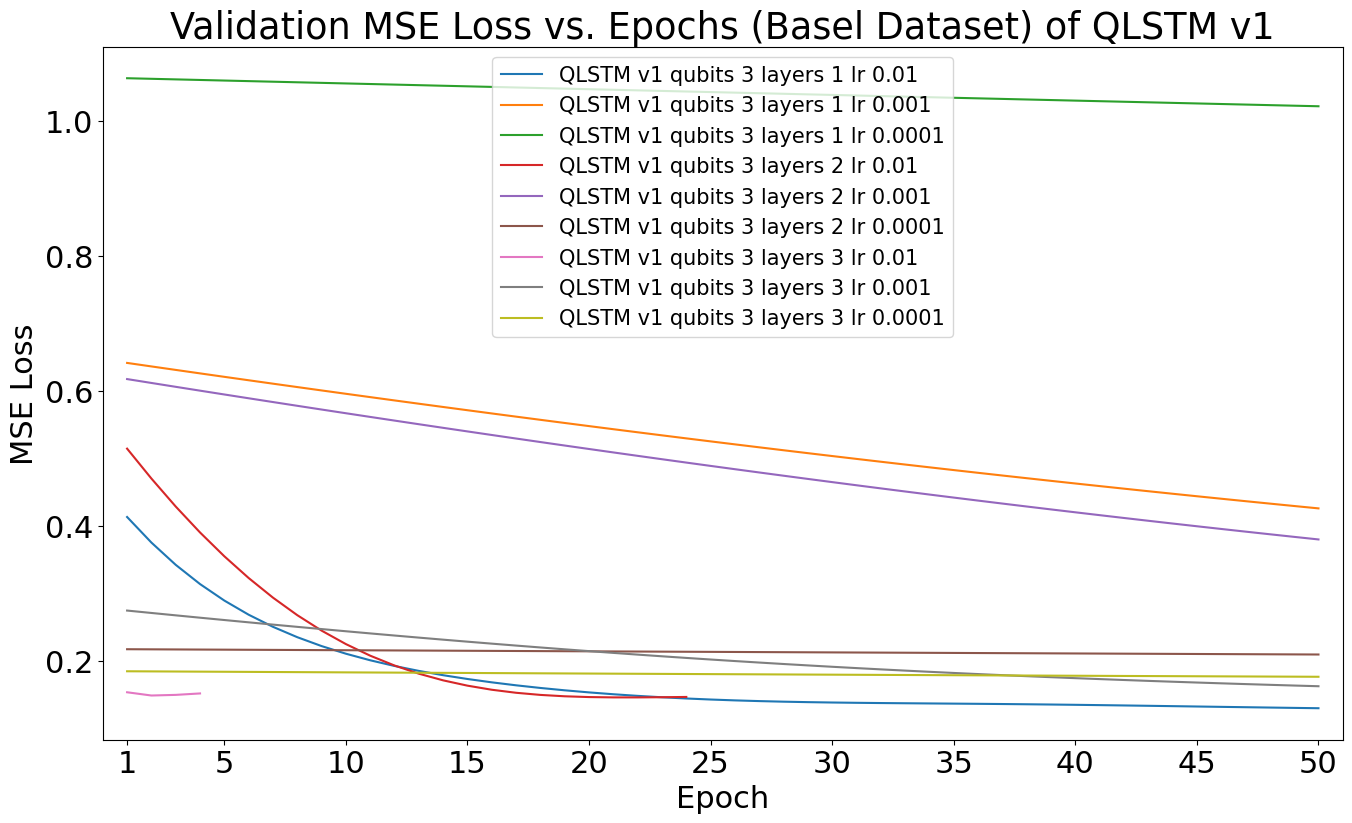

391
441
491
541
591
641
691
741
791


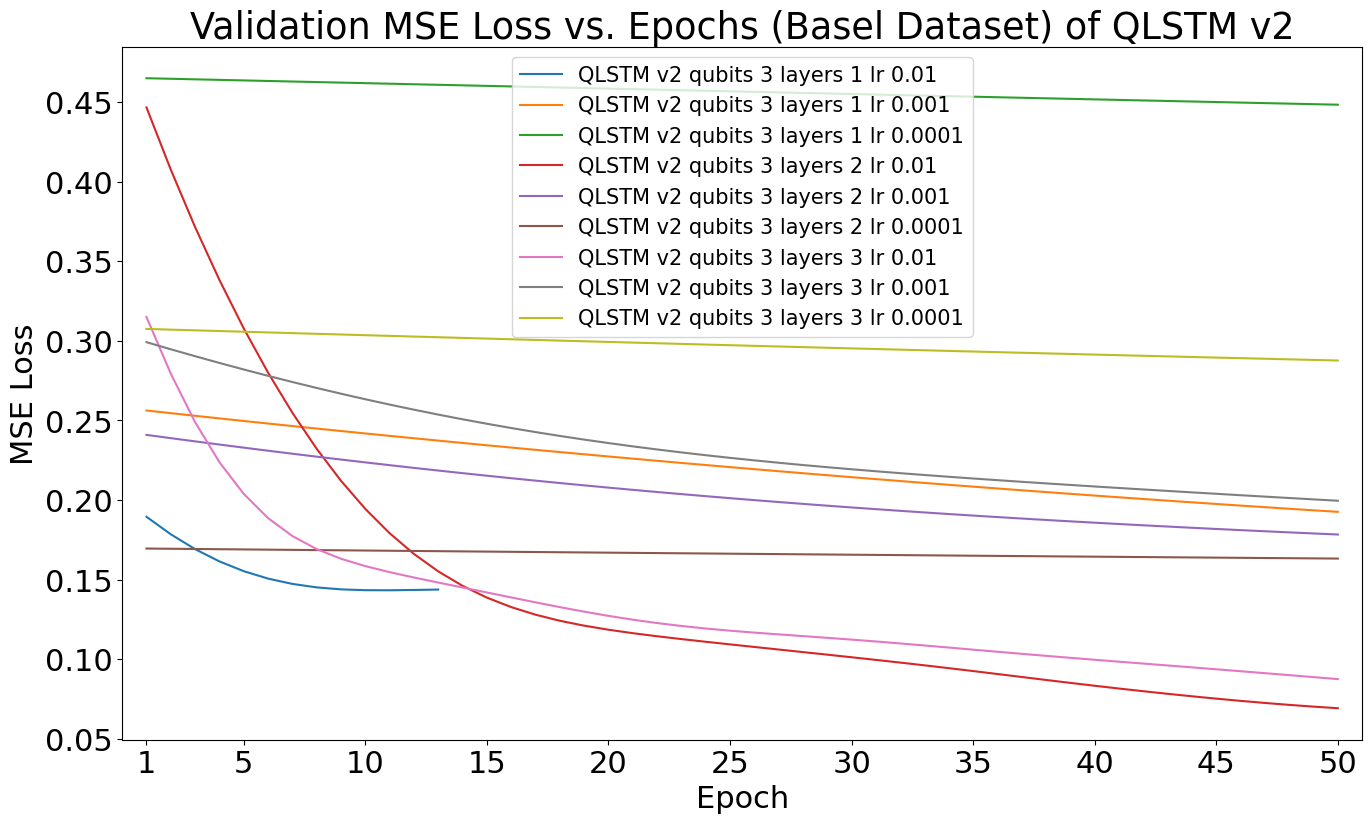

841
891
941
991
1041
1091
1141
1191
1241


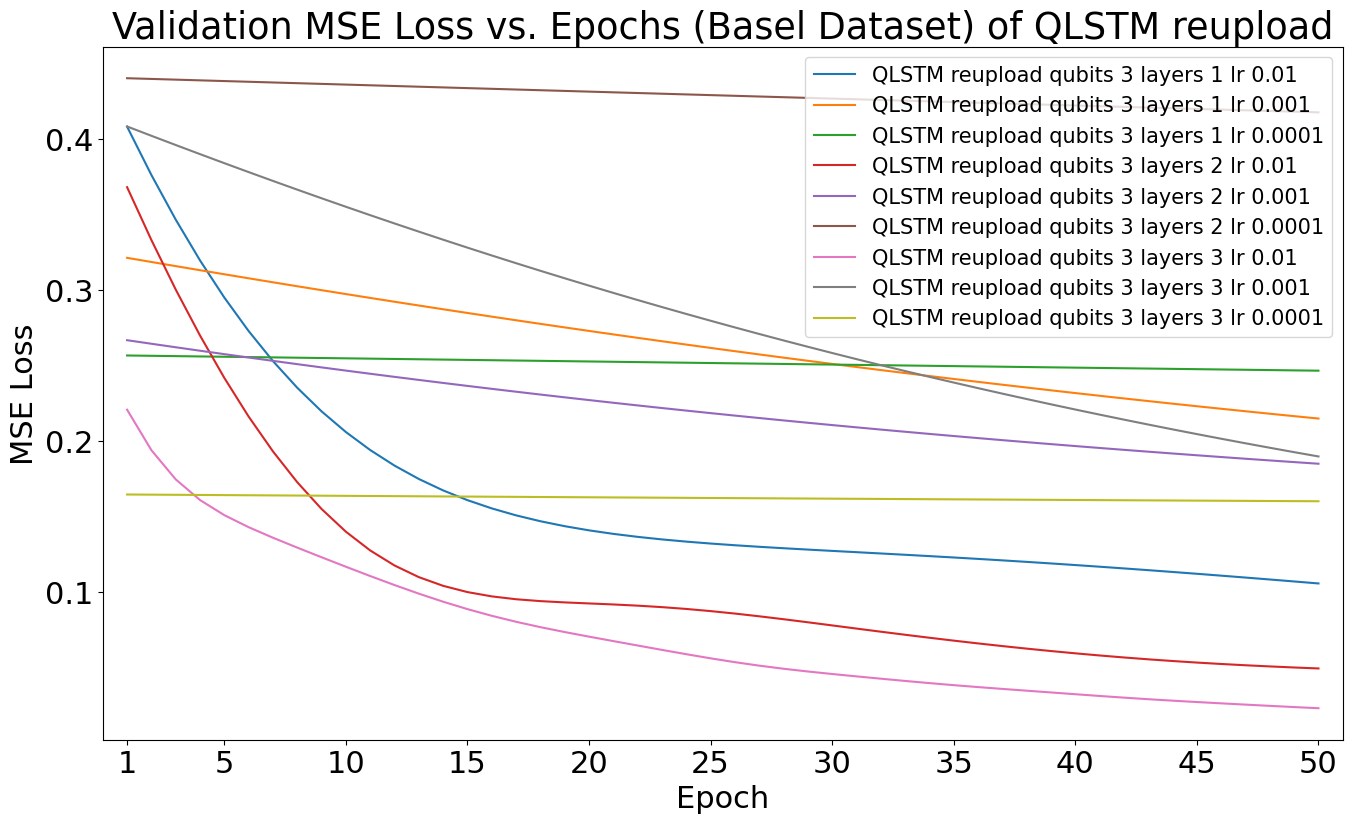

dict_keys(['basel'])


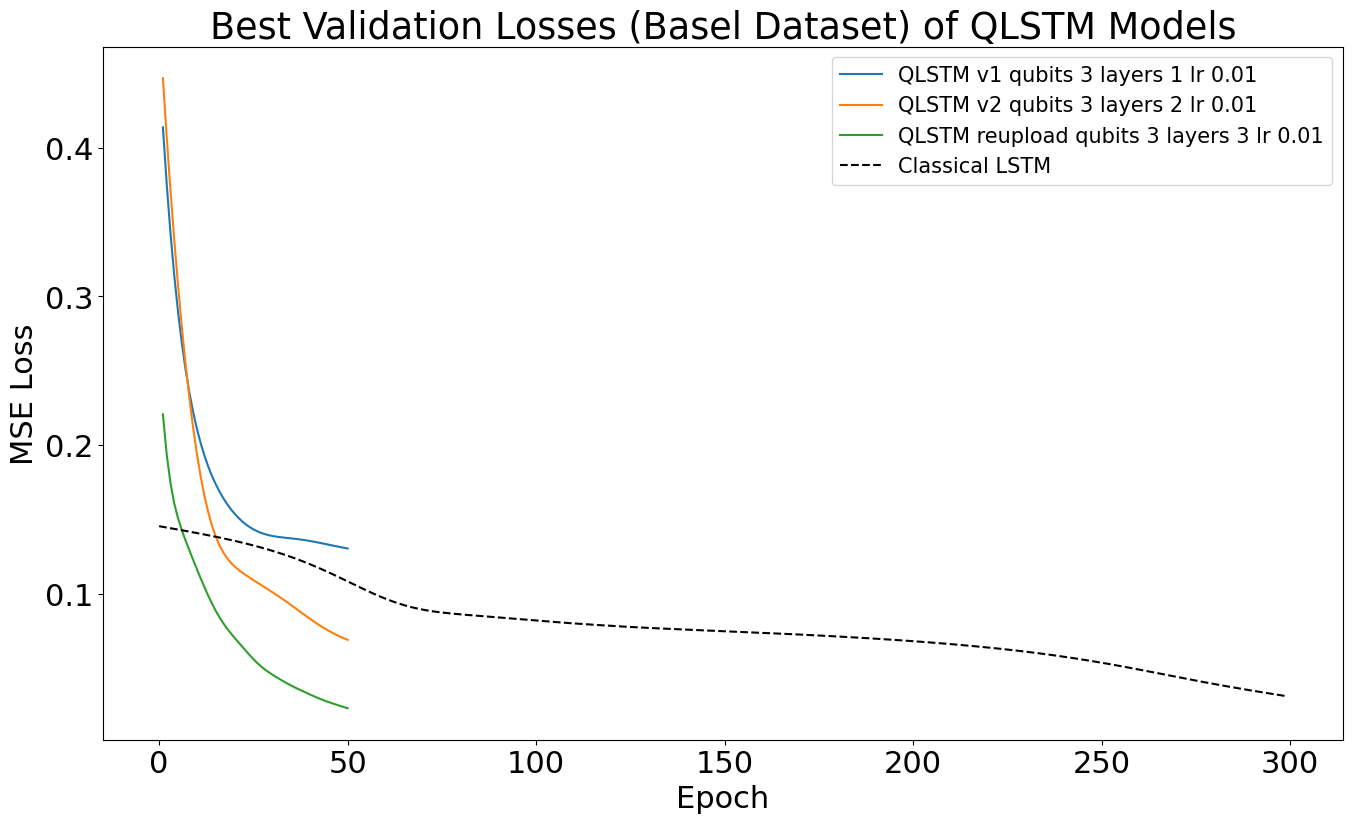

Best Loss for QLSTM v1: 0.13056894000197838
Best Loss for QLSTM v2: 0.06922314407505101
Best Loss for QLSTM reupload: 0.023225543431754602
Best Loss for LSTM: 0.03133327219193799


In [59]:

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

# def parse_filename(filename):
#     # Example: qlstm.q8.lr0.005.vv2.l3.pkl
#     parts = filename.split('.')
#     model = parts[0]
#     lr = None
#     layers = None
#     variant = None
#     for i, p in enumerate(parts):
#         if p.startswith('lr'):
#             lr = p[2:] + '.' + parts[i+1]
#         if p.startswith('l') and p[1:].isdigit():
#             layers = int(p[1:])
#         if p.startswith('v'):
#             variant = 'v1' if p[0] == 'default' else p[0]
#     return model, variant, layers, lr
def parse_filename(filename):
    # Example: qlstm.q8.lr0.005.vv2.l3.pkl
    parts = filename.split('_')
    lr = None
    layers = None
    variant = 'v1' if parts[2] == 'qubits' else parts[2]
    for i, p in enumerate(parts):
        if p.startswith('lr'):
            lr = float(parts[i+1])
        if p.startswith('layers'):
            layers = int(parts[i+1])
        if p.startswith('qubits'):
            qubits = int(parts[i+1])
    return variant, layers, lr, qubits

# Organize results by experiment, model, variant, layers, lr
results = {}
classical_dict = {}
for fname in filenames:
    file_path = os.path.join(root, fname)
    with open(file_path, 'rb') as file:
        model_dict = pickle.load(file)
    if 'classical' in fname:
        classical_dict[fname.split('.')[0].split('_')[-1]] = model_dict
        continue
    variant, layers, lr, qubits = parse_filename(fname)
    key = ('QLSTM', variant)
    if key not in results:
        results[key] = []
    val_loss, val_accuracy, best_loss = model_dict['loss'], model_dict['accuracy'], model_dict['best_loss']
    results[key].append({
        'layers': layers,
        'lr': lr,
        'val_loss': val_loss,
        'final_val_mse': best_loss,
        'qubits': qubits,
        'fname': fname
    })

# Example: Plotting for Sin Dataset (repeat for Basel if available)
# 1. Line plot of MSE loss vs. epochs for each model/variant
curr_length = 0
best_losses = []
for (model, variant), runs in results.items():
    plt.figure(figsize=(16, 9))
    
    for run in sorted(runs, key=lambda x: len(x['val_loss'])):
        label = f"{model.upper()} {variant} qubits {run['qubits']} layers {run['layers']} lr {run['lr']}"
        print(len(run['val_loss']))

        plt.plot(range(1,len(run['val_loss']) - curr_length + 1) ,run['val_loss'][curr_length:len(run['val_loss'])], label=f"{label}")
        next_length = len(run['val_loss'])
        
        run['val_loss'] = run['val_loss'][curr_length:len(run['val_loss'])]
        curr_length = next_length
    best_losses += [(model, variant, sorted(runs, key=lambda x: min(x['val_loss']))[0])]
    plt.title(f"Validation MSE Loss vs. Epochs (Basel Dataset) of QLSTM {variant}")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.xlim(0, 51)
    plt.xticks([1] + list(range(5, 51, 5)))
    plt.legend(fontsize=legend_font_size)
    plt.show()
    break    



for (model, variant), runs in results.items():
    if variant != 'v2':
        continue
    plt.figure(figsize=(16, 9))
    
    for run in sorted(runs, key=lambda x: len(x['val_loss'])):
        label = f"{model.upper()} {variant} qubits {run['qubits']} layers {run['layers']} lr {run['lr']}"
        print(len(run['val_loss']))

        plt.plot(range(1,len(run['val_loss']) - curr_length + 1) ,run['val_loss'][curr_length:len(run['val_loss'])], label=f"{label}")
        next_length = len(run['val_loss'])
        
        run['val_loss'] = run['val_loss'][curr_length:len(run['val_loss'])]
        curr_length = next_length
    best_losses += [(model, variant, sorted(runs, key=lambda x: min(x['val_loss']))[0])]
    plt.title(f"Validation MSE Loss vs. Epochs (Basel Dataset) of QLSTM {variant}")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.xlim(0, 51)
    plt.xticks([1] + list(range(5, 51, 5)))
    plt.legend(fontsize=legend_font_size)
    plt.show()

for (model, variant), runs in results.items():
    if variant != 'reupload':
        continue
    plt.figure(figsize=(16, 9))
    
    for run in sorted(runs, key=lambda x: len(x['val_loss'])):
        label = f"{model.upper()} {variant} qubits {run['qubits']} layers {run['layers']} lr {run['lr']}"
        print(len(run['val_loss']))

        plt.plot(range(1,len(run['val_loss']) - curr_length + 1) ,run['val_loss'][curr_length:len(run['val_loss'])], label=f"{label}")
        next_length = len(run['val_loss'])
        
        run['val_loss'] = run['val_loss'][curr_length:len(run['val_loss'])]
        curr_length = next_length
    best_losses += [(model, variant, sorted(runs, key=lambda x: min(x['val_loss']))[0])]
    plt.title(f"Validation MSE Loss vs. Epochs (Basel Dataset) of QLSTM {variant}")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.xlim(0, 51)
    plt.xticks([1] + list(range(5, 51, 5)))
    plt.legend(fontsize=legend_font_size)
    plt.show()

plt.figure(figsize=(16, 9))
for model, variant, run in best_losses:
    label = f"{model.upper()} {variant} qubits {run['qubits']} layers {run['layers']} lr {run['lr']}"
    plt.plot(range(1,len(run['val_loss'])+1), run['val_loss'], label=label)
print(classical_dict.keys())
plt.plot(classical_dict['basel']['loss'], label='Classical LSTM', linestyle='--', color='black')
plt.title(f"Best Validation Losses (Basel Dataset) of QLSTM Models")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend(fontsize=legend_font_size)
plt.show()

for model, variant, run in best_losses:
    print(f"Best Loss for QLSTM {variant}: {min(run['val_loss'])}")
print(f"Best Loss for LSTM: {min(classical_dict['basel']['loss'])}")
